In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [ ]:
effect_size = 0.2
sample_size = 1000
alpha=0.05
true_dist = stats.norm(effect_size,1)
sample = true_dist.rvs(sample_size)

np.random.seed(8184)

In [ ]:
stats.t.interval(alpha, sample, 0, 1)
stats.t.interval(alpha=1-alpha, loc=np.mean(sample), df=len(sample)-1, scale=stats.sem(sample))

<ipython-input-58-c420852e6f4d>:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.t.interval(alpha=1-alpha, loc=np.mean(sample), df=len(sample)-1, scale=stats.sem(sample))


(0.15432949358784148, 0.2769916919989007)

In [ ]:
t_ = stats.t(df=sample_size).ppf(1-alpha/2)
margin = t_*sample.std()/np.sqrt(sample_size)
left_lim, right_lim = sample.mean()-margin, sample.mean()+margin
left_lim, right_lim

(0.15436024116467312, 0.2769609444220691)

In [ ]:
# Defining a bootstrapping function:
def btstrp_func(data, n_iter, size=None):
    # Initialising 3 empty arrays to keep track of statistics of interest:
    stat_btstrp_arr = np.empty(n_iter)
    # Setting the size of the bootstrapped sample:
    if not size:
        size = data.shape[0]
    # Bootstrapping & calculating statistics of interest:
    for i in range(n_iter):
        stat_btstrp_arr[i] = np.random.choice(data, size=size, replace=True).mean()
    # Returning the arrays:
    return stat_btstrp_arr

In [ ]:
stat_btstrp_arr = btstrp_func(sample, 1000)
lower_ci, upper_ci = np.percentile(a=stat_btstrp_arr, q=[2.5, 97.5])#q=[alpha/2*100, (1-alpha/2)*100])
lower_ci, upper_ci

(0.15160042022176637, 0.2778895589613414)

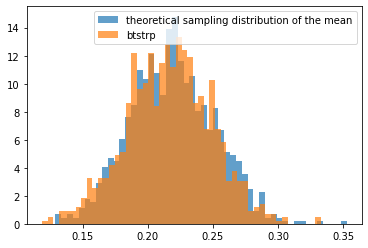

In [ ]:
bins = 50
#plt.hist(sample,bins=bins, alpha=0.7, density=True, label='sample')
plt.hist(stats.norm(loc=sample.mean(),
         scale=sample.std()/np.sqrt(sample_size)).rvs(1000),
         bins=bins, alpha=0.7, density=True,
         label='theoretical sampling distribution of the mean')
plt.hist(stat_btstrp_arr,bins=bins, alpha=0.7, density=True, label='btstrp')
plt.legend()
plt.show()

In [ ]:
from statsmodels.stats.weightstats import zconfint, _tconfint_generic

print(zconfint(x1=sample, x2=None,
         value=0, #In the one sample case, value is the mean of x1 under the Null hypothesis
         alpha=alpha, alternative='two-sided', usevar='pooled', ddof=sample_size-1)
)
_tconfint_generic(mean=sample.mean(), std_mean=sample.std(),
                  dof=sample_size-1, alpha=alpha, alternative='two-sided')

(nan, nan)


/usr/local/lib/python3.8/dist-packages/statsmodels/stats/weightstats.py:1630: RuntimeWarning: invalid value encountered in sqrt
  std_diff = np.sqrt(var_pooled)


(-2.0033552348858836, 2.196054106967192)